### **HIERARCHIAL CLUSTERING**

#### **Need of Other Clustering Methods Than KMeans**
- If the datasets have well defined boundaries then the **Kmean** clustering is fully applicalble. This realy upon the distace does not work properly beacuse the clusters with no defined boundary **Kmean** Fails.
- Does not ignore the outliers or noises.

## **TYPES OF Hierarchial Clustering**
- Agglomerative clustering
- Divisive clustering


### **Agglomerative Clustering**
- We start with the dataset and make each individual points a cluster. 
- Then the closer points are merged in the single cluster and keep the record somewhere. 
- At the end we will have the single cluster. 
- We obtain the tree like structure in the record of the cluster which we call as **Dendogram**.
- Here we have Hierarchy of the clusters thus it is called Hierarchial cluster. 
- To obtain the multiple clusters we reduce the dendogram from the root. 

### **Divisive clustering**
- Here it works same as the agglomeritive clustering but in the reverse i.e it starts with the single cluster then try to divide the cluster thus it will break down in the clustering leading to each point being a single cluster. 
- It is the exact oppostie of the Agglomerative clustering. 
- It is used less often than other. 

### **Algorithm**
- Initalize the proximity matrix.\
&darr;
- Make each point a cluster.\
&darr;
- Inside a loop
    * Merge the 2 closet cluster.
    * Update the Proximity matrix\
&darr;
- Until only one cluster is left.

The distance between the clusters is found by:
- Taking distance between clostet points. OR
- Taking the distance between the means.
- Thus there are many types 

### **TYPES OF Agglomeratice Clustering**(linkage)
1. Min(Single-link)
2. Max(Complete Link)
3. Average
4. Ward

1. Single-Link
- We find the distace of each points in one cluster to the each points of the other cluster and find the minimum distace and find the similarity.
- If there are outliers in the data the logic fails.

2. Complete link
- First distances as the single link are calculated then we do the clustering based on the max distance.
- It helps in the outlier control.
- It is not desirable for the large cluster.


3. Group Average
- We calculate the distance between two clusters by taking averge of the distance of each of the combination between clustess.
- It lies between min and max thus effect also in between.

4. Ward
- We take a centroid for every clusters and then take distance from centroids to the every points. We then sum square of the distances and substract the square of the distances of the mean point with in the cluster to the every point with in cluster for each of the clusters.
- *It is the deafult for the sklearn.* 

### **Ideal Number of the clusters.**
- Here we donot know the optimal number of the clusters thus we tkae the help of the **dendogram**. 
- We need to the longest vertical line such that the horizontal line is not cut by the vertical line. 
- Thus we cut that vertical lines by horizontal line thus we get the number of teh clusters.\
![image](1.png)

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [2]:
coustomer_data=pd.read_csv('https://raw.githubusercontent.com/campusx-official/agglomerative-hierarchical-clustering-demo/main/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [3]:
coustomer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
coustomer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
coustomer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
coustomer_data=coustomer_data.iloc[:,3:5]

In [7]:
coustomer_data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
import scipy.cluster.hierarchy as sh
import matplotlib.pyplot as plt

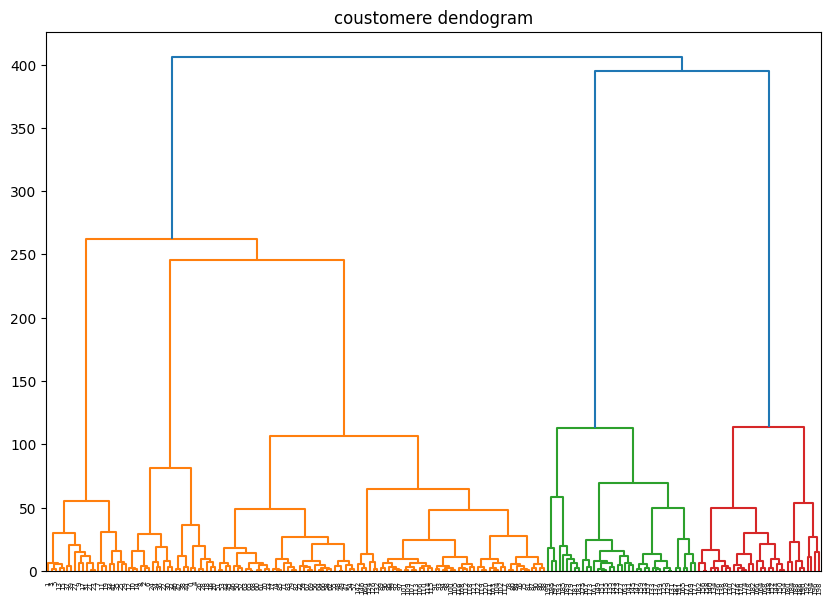

In [10]:
plt.figure(figsize=(10,7))
plt.title("coustomere dendogram")
dend=sh.dendrogram(sh.linkage(coustomer_data,method='ward'))

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean')
labels_=cluster.fit_predict(coustomer_data)

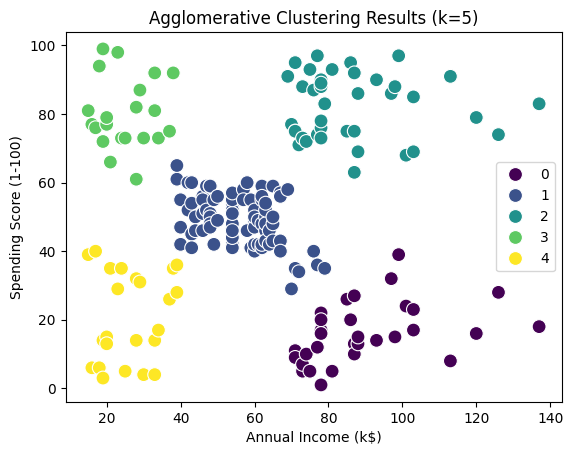

In [16]:
import seaborn as sns
sns.scatterplot(x=coustomer_data.iloc[:,0], y=coustomer_data.iloc[:,1], hue=labels_, palette='viridis', s=100)
# Plot cluster centers
#plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=20, linewidths=3, label='Centroids')

plt.title('Agglomerative Clustering Results (k=5)')
plt.legend()
plt.show()


### **BENIFITS AND LIMITATIONS**
1. It works better than kmean usign various types of linkage techinique
2. We from the dendogram while making cluster thus at each point we will have the preknown number of the clusters. 
3. We have the whole information about the hierarchy.

1. We cannot use this for the long dataset thus finiding the proximity matrix of for n*n is very difficult. Thus it cannot be used for the large dataset.